# Spectator Data Scraping Project

In [103]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [284]:
def init_driver(search_term):   
    driver = webdriver.Chrome()
    driver.get("http://www.spectator.co.uk")
    time.sleep(1)
    driver.maximize_window()
    driver.find_element(By.XPATH,"//button[@class='header-nav__button header-nav__button--search']").click()
    element_search_field = driver.find_element(By.ID,'search-field')
    element_search_field.send_keys(search_term)
    print("Searching articles for {}...\n\n".format(search_term))
    element_search_field.send_keys(Keys.ENTER)
    time.sleep(1)
    
    x=0
    author_list=[]
    title_list=[]
    d_list=[]

    while True:
#         time.sleep(1)
        next_page = driver.find_elements(By.XPATH,"//section[@class='pagination']/div/nav/div/ul//a[@class='next page-numbers']")
        if next_page == []:
            print("Data on page {} extracted.".format(x+1))
            print("Final page reached.\n\n")
            driver.close()
            break;
        else:
            articles = driver.find_elements(By.XPATH,"//div[@class='mosaic__tile mosaic__tile--lead-up']/article")

            for i, article in enumerate(articles):
                author = driver.find_elements(By.XPATH,"//div[@class='mosaic__tile mosaic__tile--lead-up']/article/header/a")[i]
                title = driver.find_elements(By.XPATH,"//div[@class='mosaic__tile mosaic__tile--lead-up']/article/header/h3/a")[i]
                description = driver.find_elements(By.XPATH,"//div[@class='mosaic__tile mosaic__tile--lead-up']/article/header/div/p")[i]

#                 print(author.text," :: ",title.text)
                author_list.append(author.text)
                title_list.append(title.text)
                d_list.append(description.text)
#             print(author_list)
#             print(title_list)
            print("Data on page {} extracted.".format(x+1))
            elem = next_page[0]
            driver.execute_script("arguments[0].click();", elem)
            x+=1

    
    data_tuples = list(zip(author_list,title_list,d_list)) # list of author and title combined
    df = pd.DataFrame(data_tuples,columns=['Author','Title','Description']) # creates dataframe of each tuple in list
    return df

In [318]:
term = "Imran Khan"
df_main = pd.DataFrame(columns=['Author','Title','Description'])
articles = []
df = init_driver(term)
print("Data Extraction complete!\n\n")
print("Total {} articles extracted about {}".format(len(df)-1,term))
df_main = pd.DataFrame(columns=['Author','Title','Description'])
df_main = pd.concat([df_main,df])

Searching articles for Imran Khan...


Data on page 1 extracted.
Data on page 2 extracted.
Data on page 3 extracted.
Data on page 4 extracted.
Final page reached.


Data Extraction complete!


Total 59 articles extracted about Imran Khan


In [319]:
# display(df_main[df_main.Author=="The Spectator"])
df_main

,Author,Title,Description
0,Francis Pike,The troubling arrest of Imran Khan,"The saga of Imran Khan’s political career rumbles on. While on his way to the High Court in Islamabad yesterday to defend himself against trumped-up charges of political corruption, Khan was ambushed inside the judicial compound by enforcement paramilitaries known as the Pakistani Rangers. After Khan and his lawyers were allegedly beaten up, he was"
1,Kunwar Khuldune Shahid,Is this the end of Imran Khan?,"Imran Khan’s innings as the Pakistani Prime Minister may be coming to an end. The Muttahida Qaumi Movement, one of his coalition partners, has split from the government. Khan has now lost his majority in the National Assembly, which is set to meet for a no-confidence vote on Sunday. And while all this falls perfectly"
2,Jawad Iqbal,Pakistan deserves better than Imran Khan,"Democracy and the rule of law have always struggled to take hold in Pakistan, a country in which no elected prime minister has yet completed a full term in office and where the military has been in power for nearly half of its history. The latest antics of Imran Khan, the former prime minister, do"
3,Francis Pike,Who tried to assassinate Imran Khan? And why?,"At the end of August I warned in The Spectator that, in Pakistan politics, ‘death by assassination is always a risk.’ And so yesterday’s attempted assassination of Imran Khan – while shocking – should have come as no surprise. Perhaps the bigger surprise was that he survived. As Imran himself stated immediately afterwards, ‘Allah has given me"
4,Francis Pike,Is Imran Khan Pakistan’s Donald Trump?,"Imran Khan, the cricketing hero, legendary lothario and deposed prime minister of Pakistan, is in trouble again. His political opponents in the police and the judiciary, in a manner not dissimilar to the judicial attack on former US president Donald Trump, have moved against Khan in recent days by accusing him of terrorist activities. In theory,"
5,Francis Pike,Can Imran Khan cling on to power in Pakistan?,"In the brief interlude of Chechen independence between the Russia-Chechen Wars of the 1990s, I travelled with Imran Khan from Grozny to Baku, where we were due to meet Azerbaijan’s finance minister. We had different reasons for our visit. I was interested in the business potential of the countries of the Caucasus, while Khan, a"
6,Kunwar Khuldune Shahid,"What next for Imran Khan, Pakistan’s ousted leader?","On Sunday, Imran Khan became the first prime minister in Pakistan’s history to be ousted by a no-confidence vote. Followers of Khan’s Pakistan Tehreek-e-Insaf party naturally took to the streets; much of their anger has been directed at the generals who engineered their leader’s downfall. It was a clash with the all-powerful military that, like"
7,Francis Pike,Pakistan is on the brink,"On Tuesday I speculated that Pakistan’s former Prime Minister Imran Khan, now the opposition leader, was so popular that he might have to be shot by his enemies to prevent him from coming back to power. This was not a throwaway statement. After Sri Lanka and Lebanon, whose political murder rate since the second world"
8,Kunwar Khuldune Shahid,Imran Khan’s cowardly response to Pakistan’s rape crisis,"Pakistan’s prime minister Imran Khan has once again blamed women for an appalling rise in rape cases. Khan used a televised question and answer session this week to say that sexual violence was a result of ‘increasing obscenity’. Women in Pakistan should remove ‘temptation’ because ‘not everyone has willpower’, he added, urging females to cover up to help"
9,Kunwar Khuldune Shahid,Imran Khan’s dangerous bid to export Pakistan’s blasphemy laws,"Imran Khan appears to want to impose Islamic blasphemy laws across the world. ‘I want the Muslim countries to devise a joint line of action over the blasphemy issue with a warning of trade boycott of countries where such incidents will happen,’ Khan said in an address on Monday. Last week, talking up his plan"


# Number of Articles pulished by each Author

Text(0.5, 1.0, 'Number of Articles published for Imran Khan')

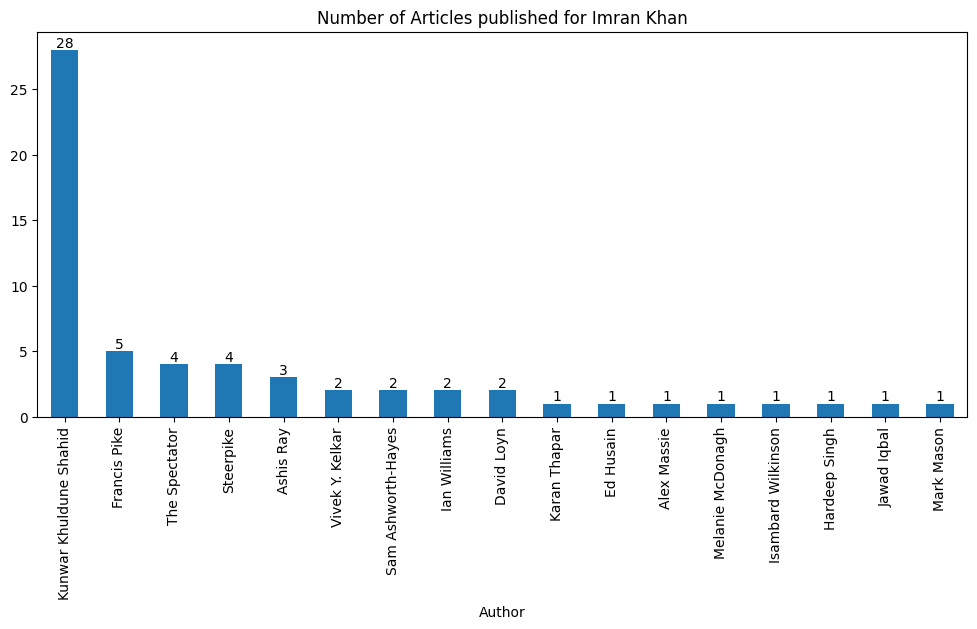

In [320]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = df.Author.value_counts().head(25).plot.bar()
ax.bar_label(ax.containers[0])
ax.set_title("Number of Articles published for {}".format(term))

# Word Cloud

There are 20253 words found in the description column.


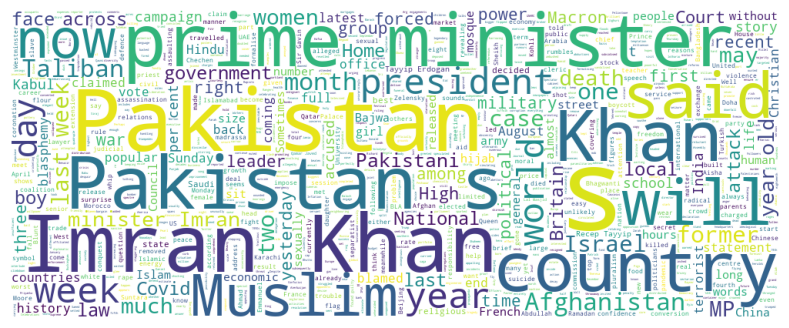

In [321]:
fig, ax = plt.subplots(figsize=(12, 4))
text = " ".join(word for word in df.Description)
print ("There are {} words found in the description column.".format(len(text)))
# stopwords = ["S","the"]
# print(text)
wordcloud = WordCloud(max_font_size=150, max_words=1000, background_color="white", width=1000, height=400,).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()